In [27]:
import numpy as np
import cv2
import os
import shutil
import random
import pandas as pd
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [28]:
if os.path.isdir("Training") or os.path.isdir("Validation"):
    print("Directory exist")
else:
    os.mkdir("Training")
    os.mkdir("Validation")
    os.mkdir("Training/Fake")
    os.mkdir("Training/Real")
    os.mkdir("Validation/Fake")
    os.mkdir("Validation/Real")

Directory exist


In [29]:
def dirHandler(path, name):
    for i in os.listdir(path):
        for j in os.listdir(path+i):
            if "forg" in i:
                shutil.copyfile(path+i+"/"+j, f"{name}/Fake/{j}")
            else:
                shutil.copyfile(path+i+"/"+j, f"{name}/Real/{j}")
    

In [30]:
dirHandler("sign_data/train/", "Training")
dirHandler("sign_data/test/", "Validation")

In [31]:
train_dir = "Training"
val_dir = "Validation"
CATEGORIES = ["Fake","Real"]

In [32]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(CATEGORIES[y[i]])
        plt.axis("off")
    plt.show()

In [33]:
def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])

In [34]:
def get_data(directory, list_dir):
    IMG_SIZE= 100
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for i, img in enumerate(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
            list_dir.append([new_array, class_num])

In [35]:
train_data = []
val_data = []
 
get_data(train_dir,train_data)
get_data(val_dir,val_data)

In [36]:
len(train_data), len(val_data)

(1649, 500)

In [37]:
random.shuffle(train_data)
random.shuffle(val_data)

In [38]:
X_train = []
y_train = []
X_val = []
y_val = []

split_train_test(train_data, X_train,y_train)
split_train_test(val_data, X_val,y_val)

In [39]:
len(X_train), len(X_val), len(y_train), len(y_val)

(1649, 500, 1649, 500)

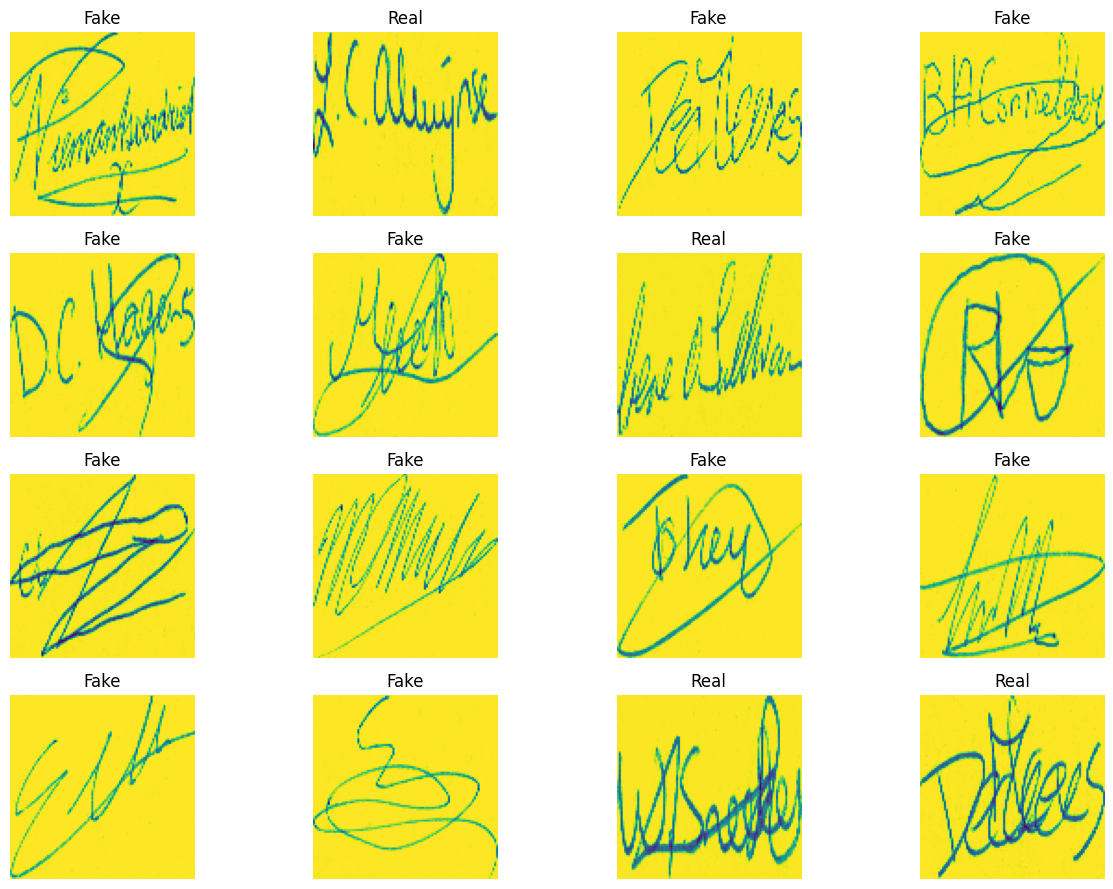

In [40]:
plotImages(X_train,y_train)

In [41]:
def plot_bar_chart_diagram(path_data):
    dic = {}
    for file in os.listdir(path_data):
        dem = 0
        for x in os.listdir(path_data + "/" + file):
            dem += 1
        dic[file] = dem
    print(dic)
    barlist = plt.bar(list(range(len(dic))),
                      list(dic.values()),
                      tick_label=list(dic.keys()))
    plt.show()

{'Fake': 762, 'Real': 887}


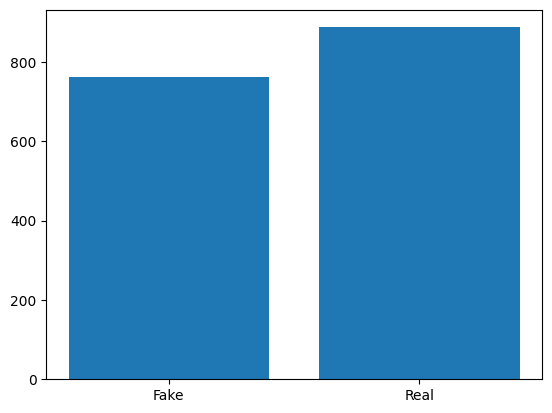

In [42]:
plot_bar_chart_diagram("Training")

{'Fake': 248, 'Real': 252}


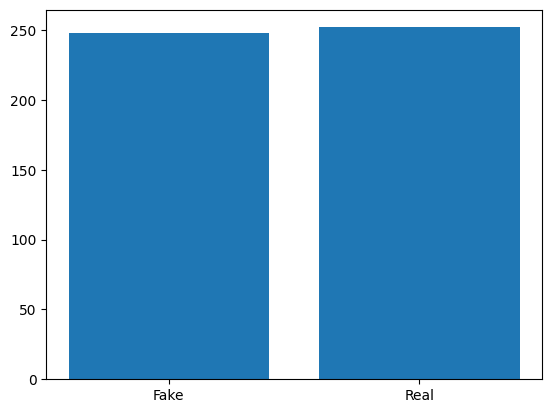

In [43]:
plot_bar_chart_diagram("Validation")

In [44]:
def preprocess(image):
    img = image.reshape(10000)
    return img

In [45]:
def random_forest_training(trainX, trainY):
    forest = RandomForestClassifier(n_estimators=50)
    forest.fit(trainX, trainY)
    return forest

def random_forest_predictions(testX, forest):
    predictions = forest.predict(testX)    
    return predictions

In [46]:
xtrain = list(map(preprocess, X_train))
xval = list(map(preprocess, X_val))

In [47]:
forest = random_forest_training(xtrain, y_train)
predictions = random_forest_predictions(xval, forest)

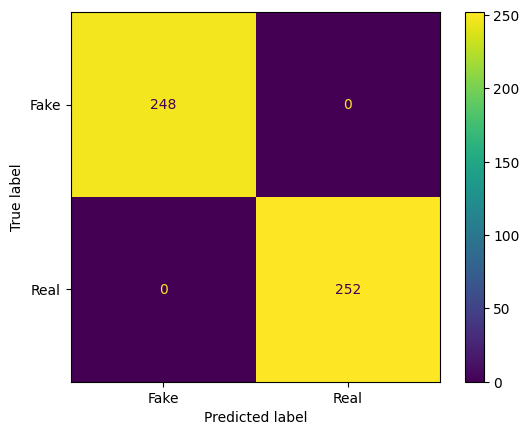

In [48]:
display(ConfusionMatrixDisplay(confusion_matrix(predictions, y_val), display_labels=CATEGORIES).plot())

In [49]:
print("Accuracy Score :",accuracy_score(predictions, y_val))

Accuracy Score : 1.0


In [50]:
img_array = cv2.imread("rr.png")
new_array = cv2.resize(img_array, (100, 100))
new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY).reshape(10000)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
predictedIndex = random_forest_predictions([new_array], forest)

In [ ]:
print("Predicted Class is",CATEGORIES[forest.classes_[predictedIndex[0]]])

NameError: name 'CATEGORIES' is not defined